In [40]:
import matplotlib.pyplot as plt
import numpy as np
# import math
# from scipy.misc import imsave
%matplotlib inline

In [41]:
list_1 = [0,0,1,0,1]
list_2 = [1,1,1,1,1]
image_OR = (list_1[0] and list_2[0]) or (list_1[1] and list_2[1]) or (list_1[2] and list_2[2])
image_OR

1

In [42]:
def m_f_0_and(l1,l2):
    n = len(l1)
    s = []
    for i in range(n):
        a=(l1[i] and l2[i])
        s.append(a)
    return s


In [43]:
def m_f_1_AND_or_OR(l1, operator=0):
    if operator:
        if 1 in l1:
            s1 = 1
        else:
            s1 = 0
    else:
        if 0 in l1:
            s1 = 0
        else:
            s1 = 1   
    return s1

In [44]:
def m_f_2_combine(l1, l2, op=0):
    a =  m_f_0_and(l1, l2)
    return m_f_1_AND_or_OR(a, op)

In [45]:
list_1 = [1,1,1,1,1] # mask
list_2 = [1,1,1,1,1] # block

m_f_2_combine(list_1, list_2, 1)

1

In [46]:
def convert_RGB_to_monochrome_BW(image_1, threshold = 100):
    img_1 = image_1 #plt.imread(image_1)
    img_2 = np.zeros((img_1.shape[0], img_1.shape[1]))
    for i in range(img_2.shape[0]):
        for j in range(img_2.shape[1]):
            if(img_1[i,j,0]/3 + img_1[i,j,1]/3 + img_1[i,j,1]/3) > threshold:
                img_2[i,j] = 0
            else:
                img_2[i,j] = 1
    return img_2

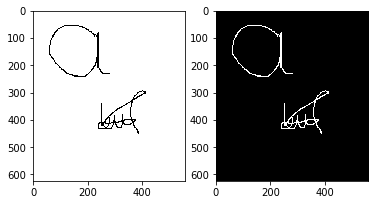

In [47]:
path_file = r"C:\Users\Beyza\dilation.png"

img_1 = plt.imread(path_file)

img_2 = convert_RGB_to_monochrome_BW(img_1, 0.5)

plt.subplot(1,2,1),plt.imshow(img_1)
plt.subplot(1,2,2),plt.imshow(img_2, cmap = 'gray')
plt.show()

In [48]:
img_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
np.max(img_1)

1.0

In [50]:
np.max(img_2)

1.0

In [51]:
def define_mask_1():
    mask_1 = [[1,1,1], [1,1,1], [1,1,1]]
    return mask_1

In [52]:
def my_dilation(img_1, mask,morphologyOperation='dilation'):
    #morphology operation= 'dilation' or 'erosion'
    m = img_1.shape[0]  #100
    n = img_1.shape[1]  #100
    img_2 = np.random.randint(0, 1, (m, n))
    for i in range(1, m-1):  #padding
        for j in range (1, n-1):
            x_1 = img_1[i ,j] == mask[1][1]
            
            x_2 = img_1[i-1 ,j-1] == mask[0][0]
            x_3 = img_1[i-1 ,j] == mask[0][1]
            x_4 = img_1[i-1 ,j+1] == mask[0][2]
            
            x_5 = img_1[i+1 ,j-1] == mask[2][0]
            x_6 = img_1[i+1 ,j] == mask[2][1]
            x_7 = img_1[i+1 ,j+1] == mask[2][2]
            
            x_8 = img_1[i ,j-1] == mask[1][0]
            x_9 = img_1[i ,j+1] == mask[1][2]
            
            if( morphologyOperation == 'dilation'):

                result_1 = x_1 or x_2 or x_3 or x_4 or x_5
                result_2 = x_6 or x_7 or x_8 or x_9
            
                result = result_1 or result_2
                
            elif( morphologyOperation == 'erosion'):

                result_1 = x_1 and x_2 and x_3 and x_4 and x_5
                result_2 = x_6 and x_7 and x_8 and x_9
            
                result = result_1 and result_2
            
            img_2[i,j] = result

    return img_2

In [53]:
img_3 = my_dilation(img_2, define_mask_1())
img_4 = my_dilation(img_3, define_mask_1())
img_5 = my_dilation(img_4, define_mask_1())

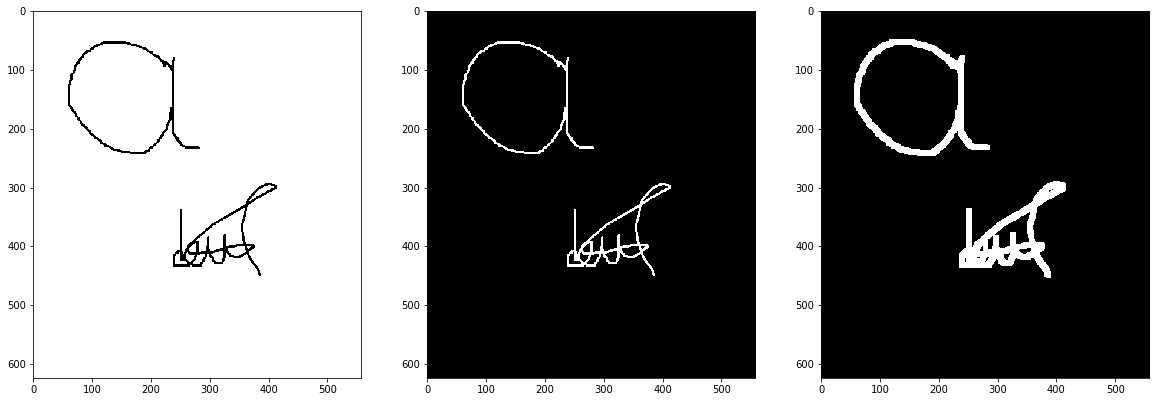

In [54]:
plt.figure(figsize = (20,20))
#plt.subplot(1,3,1), plt.imshow(img_1)
plt.subplot(1,3,1), plt.imshow(img_1)
plt.subplot(1,3,2), plt.imshow(img_2, cmap = 'gray')
plt.subplot(1,3,3), plt.imshow(img_5, cmap = 'gray')
plt.show()

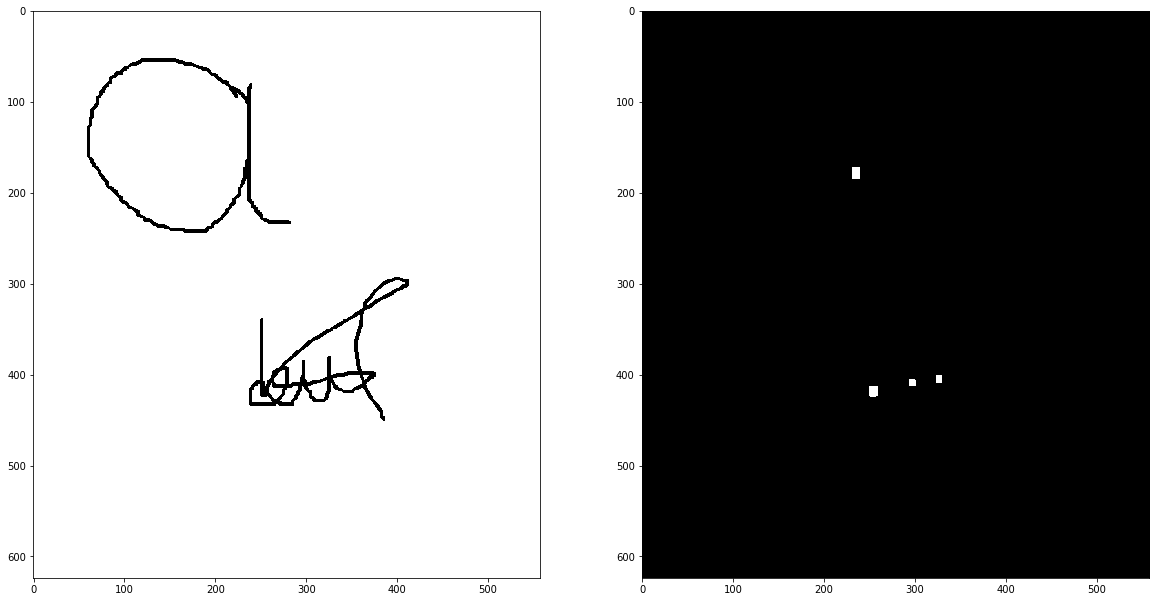

In [55]:
img_3 = my_dilation(img_2, define_mask_1(), 'erosion')   #opening operation
img_4 = my_dilation(img_3, define_mask_1(), 'erosion')
img_5 = my_dilation(img_4, define_mask_1(), 'erosion')

img_6 = my_dilation(img_5, define_mask_1(), 'dilation')
img_7 = my_dilation(img_6, define_mask_1(), 'dilation')
img_8 = my_dilation(img_7, define_mask_1(), 'dilation')

plt.figure(figsize = (20,20))

plt.subplot(1,2,1), plt.imshow(img_1)
plt.subplot(1,2,2), plt.imshow(img_8, cmap = 'gray')
plt.show()

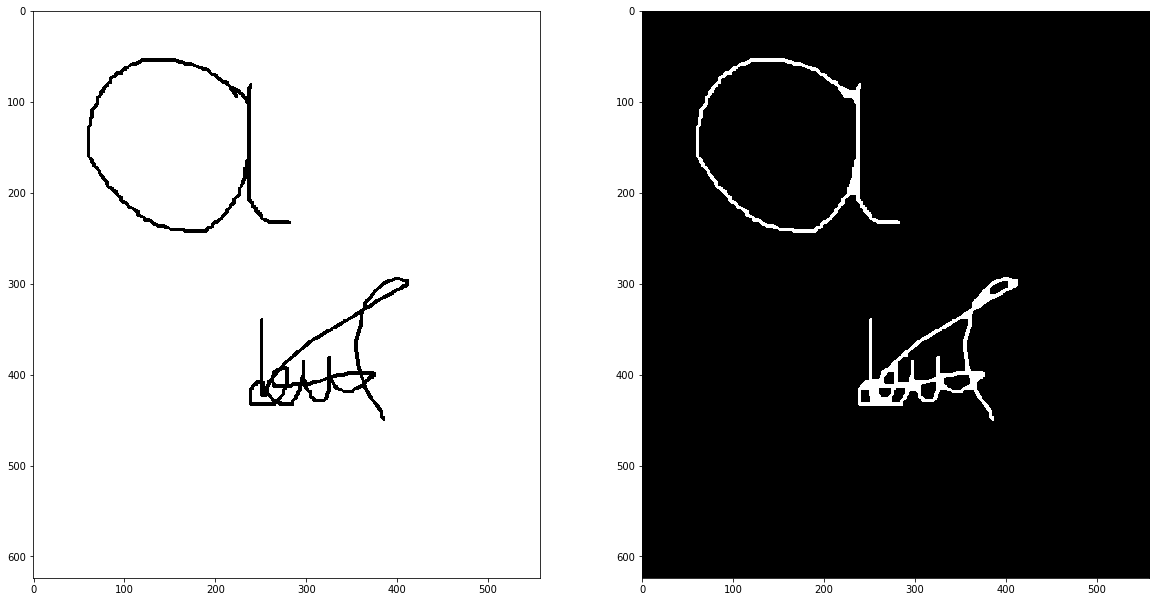

In [56]:
img_3 = my_dilation(img_2, define_mask_1(), 'dilation')  #closing operations
img_4 = my_dilation(img_3, define_mask_1(), 'dilation')
img_5 = my_dilation(img_4, define_mask_1(), 'dilation')

img_6 = my_dilation(img_5, define_mask_1(), 'erosion')   
img_7 = my_dilation(img_6, define_mask_1(), 'erosion')
img_8 = my_dilation(img_7, define_mask_1(), 'erosion')

plt.figure(figsize = (20,20))

plt.subplot(1,2,1), plt.imshow(img_1)
plt.subplot(1,2,2), plt.imshow(img_8, cmap = 'gray')
plt.show()



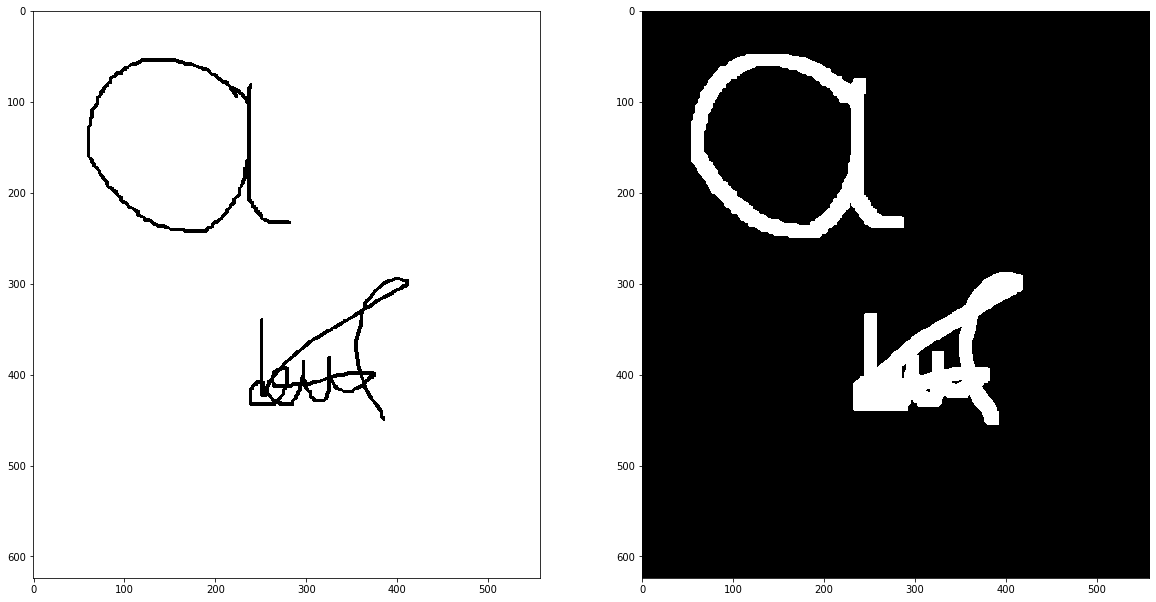

In [57]:
img_9 = my_dilation(img_8, define_mask_1(), 'dilation') 
img_10 = my_dilation(img_9, define_mask_1(), 'dilation')
img_11 = my_dilation(img_10, define_mask_1(), 'dilation')
img_12 = my_dilation(img_11, define_mask_1(), 'dilation')
img_13 = my_dilation(img_12, define_mask_1(), 'dilation')


plt.figure(figsize = (20,20))

plt.subplot(1,2,1), plt.imshow(img_1)
plt.subplot(1,2,2), plt.imshow(img_13, cmap = 'gray')
plt.show()